# MATERNAL HEALTH RISK ANALYSIS

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [3]:
#Reading the file that we're going to work
data = pd.read_csv('Maternal Health Risk Data Set.csv')
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [4]:
#The number of variables and datapoints in the dataset
data.shape

(1014, 7)

In [5]:
#The variables in our dataset
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [6]:
#Checking for null values in our dataset
print("Missing Values:") 
data.isnull().values.any()

Missing Values:


False

In [7]:
#Checking for the data types of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [8]:
#Summary of the statistics of a DataFrame 
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [9]:
#Changing categorical variable (Risk Level) to numerical 
data['RiskLevel'].replace({'low risk': 0, 'mid risk': 1, 'high risk': 2}, inplace=True)
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2
1010,55,120,90,18.0,98.0,60,2
1011,35,85,60,19.0,98.0,86,2
1012,43,120,90,18.0,98.0,70,2


## Measures of Central Tendency of Features

In [10]:
# Mean, Median, Mode of attributes
print("SystolicBP:")
mean = data['SystolicBP'].mean()
median=data['SystolicBP'].median()
mode=data['SystolicBP'].mode()
print("Mean of Blood Pressure: ",mean)
print("Median of Upper value of Blood Pressure: ",median)
print("Mode of Upper value of Blood Pressure : ",mode)
print( )

print("DiastolicBP:")
mean = data['DiastolicBP'].mean()
median=data['DiastolicBP'].median()
mode=data['DiastolicBP'].mode()
print("Mean of Lower value of Blood Pressure : ",mean)
print("Median of Lower value of Blood Pressure : ",median)
print("Mode of Lower value of Blood Pressure : ",mode)
print( )


print("BS:")
mean = data['BS'].mean()
median=data['BS'].median()
mode=data['BS'].mode()
print("Mean  of Blood glucose levels: ",mean)
print("Median  of Blood glucose levels: ",median)
print("Mode  of Blood glucose levels: ",mode)
print()

print("Heart Rate:")
mean = data['HeartRate'].mean()
median=data['HeartRate'].median()
mode=data['HeartRate'].mode()
print("Mean of resting heart rate : ",mean)
print("Median  of resting heart rate : ",median)
print("Mode  of resting heart rate : ",mode)
print()

print("Body Temperature:")
mean = data['BodyTemp'].mean()
median=data['BodyTemp'].median()
mode=data['BodyTemp'].mode()
print("Mean of Body Temperature: ",mean)
print("Median of Body Temperature : ",median)
print("Mode of Body Temperature : ",mode)
print()

SystolicBP:
Mean of Blood Pressure:  113.19822485207101
Median of Upper value of Blood Pressure:  120.0
Mode of Upper value of Blood Pressure :  0    120
Name: SystolicBP, dtype: int64

DiastolicBP:
Mean of Lower value of Blood Pressure :  76.46055226824457
Median of Lower value of Blood Pressure :  80.0
Mode of Lower value of Blood Pressure :  0    80
Name: DiastolicBP, dtype: int64

BS:
Mean  of Blood glucose levels:  8.725986193293886
Median  of Blood glucose levels:  7.5
Mode  of Blood glucose levels:  0    7.5
Name: BS, dtype: float64

Heart Rate:
Mean of resting heart rate :  74.30177514792899
Median  of resting heart rate :  76.0
Mode  of resting heart rate :  0    70
Name: HeartRate, dtype: int64

Body Temperature:
Mean of Body Temperature:  98.66508875739645
Median of Body Temperature :  98.0
Mode of Body Temperature :  0    98.0
Name: BodyTemp, dtype: float64



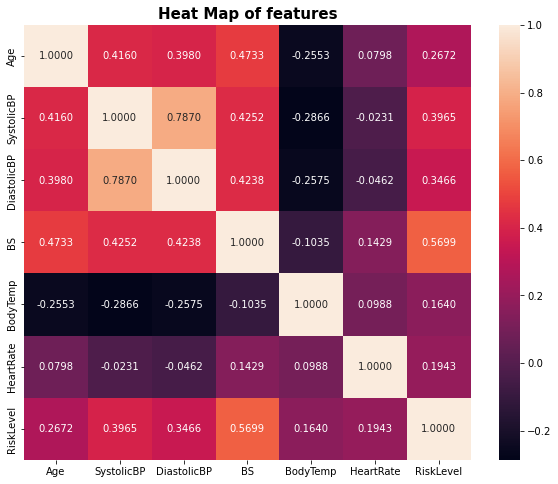

In [11]:
#Correlation using heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data.corr(method="pearson"), annot=True,  fmt='.4f', ax=ax)
plt.title('Heat Map of features',fontsize = 15, fontweight = 'bold')
plt.show()

In [12]:
#Karl Pearson's Correlation Coefficient using correlation matrix
corr_matrix=data.corr()
corr_matrix

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798,0.267225
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108,0.396473
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151,0.346649
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867,0.569942
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771,0.163984
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000,0.194312
RiskLevel,0.267225,0.396473,0.346649,0.569942,0.163984,0.194312,1.000000


In [13]:
#Correlation between Risk Level and other variables
corr_RiskLevel = data.corr()['RiskLevel']
corr_RiskLevel.abs().sort_values(ascending=False)

RiskLevel      1.000000
BS             0.569942
SystolicBP     0.396473
DiastolicBP    0.346649
Age            0.267225
HeartRate      0.194312
BodyTemp       0.163984
Name: RiskLevel, dtype: float64

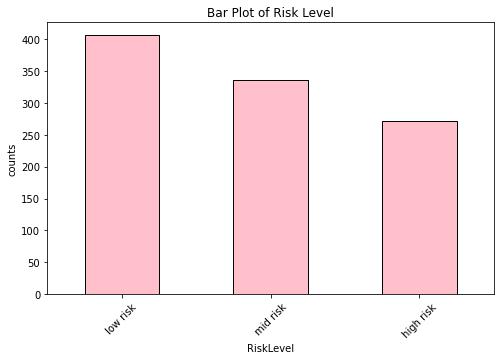

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

In [14]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')
df['RiskLevel'].value_counts().plot(kind='bar',
                                      color='pink',
                                      edgecolor='black',
                                      title='Bar Plot of Risk Level',
                                      rot=45,
                                      figsize=(8,5))
plt.xlabel('RiskLevel')
plt.ylabel('counts')
plt.show()
df['RiskLevel'].value_counts()

## Scatter Plot

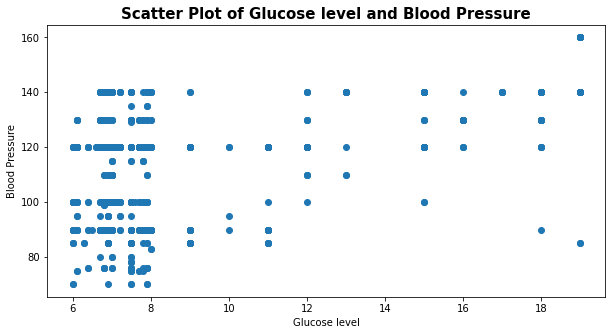

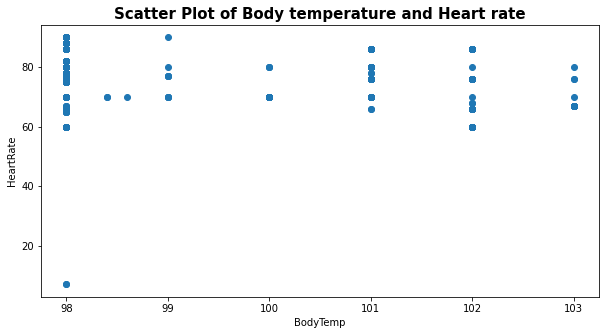

In [15]:
# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(data['BS'], data['SystolicBP'],  cmap='viridis')

# Add axis labels
plt.xlabel('Glucose level')
plt.ylabel("Blood Pressure")

# Add plot title
plt.title('Scatter Plot of Glucose level and Blood Pressure',fontsize = 15, fontweight = 'bold')

# Show plot
plt.show()

# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(data['BodyTemp'], data['HeartRate'],  cmap='viridis')

# Add axis labels
plt.xlabel('BodyTemp')
plt.ylabel("HeartRate")

# Add plot title
plt.title('Scatter Plot of Body temperature and Heart rate',fontsize = 15, fontweight = 'bold')

# Show plot
plt.show()

## Box Plot

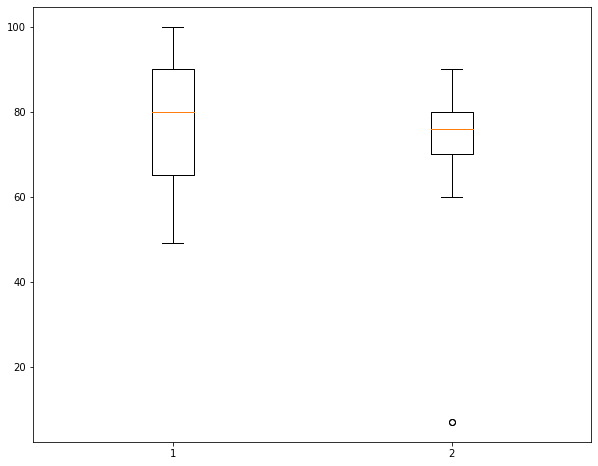

In [16]:
#Boxplot of various attributes
fig, ax = plt.subplots(figsize=(10,8))
plt.boxplot([data['DiastolicBP'],data['HeartRate']])
plt.show()

## Feature Importance

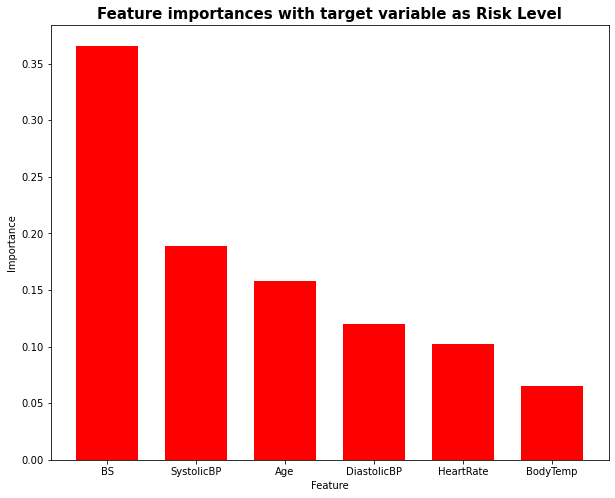

Age 0.1576
SystolicBP 0.1887
DiastolicBP 0.1203
BS 0.3658
BodyTemp 0.0654
HeartRate 0.1023


In [17]:
# separate the data into features (X) and target (y)
fig, ax = plt.subplots(figsize=(10, 8))
X = data.drop('RiskLevel', axis=1)
y = data['RiskLevel']

# train a random forest classifier
clf = RandomForestClassifier()
clf.fit(X, y)

# get the feature importances from the classifier
importances = clf.feature_importances_

# get the feature names
feature_names = X.columns

# create a dictionary of feature names and importances
feature_importances = dict(zip(feature_names, importances))

# sort the feature importances by importance
sorted_feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse=True)}

# plot the feature importances using a bar chart
plt.bar(range(len(sorted_feature_importances)), list(sorted_feature_importances.values()), align='center',width=0.7,color="r")
plt.xticks(range(len(sorted_feature_importances)), list(sorted_feature_importances.keys()))
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.title("Feature importances with target variable as Risk Level",fontsize = 15, fontweight = 'bold')
plt.show()


# get the selected features
sfm = SelectFromModel(clf, threshold=0.01)
sfm.fit(X, y)
selected_features = X.columns[sfm.get_support()]

# print the selected features and their importances
for feature, importance in zip(selected_features, importances):
    print(feature,round(importance,4))

## Calculating the count and analysing pregnancy risk rate in three sub categories of age

In [18]:
0

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Group
0,25,130,80,15.0,98.0,86,2,middle-aged
1,35,140,90,13.0,98.0,70,2,middle-aged
2,29,90,70,8.0,100.0,80,2,middle-aged
3,30,140,85,7.0,98.0,70,2,middle-aged
4,35,120,60,6.1,98.0,76,0,middle-aged
...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2,middle-aged
1010,55,120,90,18.0,98.0,60,2,senior
1011,35,85,60,19.0,98.0,86,2,middle-aged
1012,43,120,90,18.0,98.0,70,2,senior


In [19]:
#Finding the count
print(data[(data["Group"] == "young") & (data["RiskLevel"] == 0)].RiskLevel.value_counts()[0])
print(data[(data["Group"] == "young") & (data["RiskLevel"] == 1)].RiskLevel.value_counts()[1])
print(data[(data["Group"] == "young") & (data["RiskLevel"] == 2)].RiskLevel.value_counts()[2])
print(data[(data["Group"] == "middle-aged") & (data["RiskLevel"] == 0)].RiskLevel.value_counts()[0])
print(data[(data["Group"] == "middle-aged") & (data["RiskLevel"] == 1)].RiskLevel.value_counts()[1])
print(data[(data["Group"] == "middle-aged") & (data["RiskLevel"] == 2)].RiskLevel.value_counts()[2])
print(data[(data["Group"] == "senior") & (data["RiskLevel"] == 0)].RiskLevel.value_counts()[0])
print(data[(data["Group"] == "senior") & (data["RiskLevel"] == 1)].RiskLevel.value_counts()[1])
print(data[(data["Group"] == "senior") & (data["RiskLevel"] == 2)].RiskLevel.value_counts()[2])

139
101
39
195
171
101
72
64
132


In [20]:
sections = [(data["Group"] == "young") & (data["RiskLevel"] == 0),\
           (data["Group"] == "young") & (data["RiskLevel"] == 1),\
           (data["Group"] == "young") & (data["RiskLevel"] == 2),\
           (data["Group"] == "middle-aged") & (data["RiskLevel"] == 0),\
           (data["Group"] == "middle-aged") & (data["RiskLevel"] == 1),\
           (data["Group"] == "middle-aged") & (data["RiskLevel"] == 2),\
           (data["Group"] == "senior") & (data["RiskLevel"] == 0),\
           (data["Group"] == "senior") & (data["RiskLevel"] == 1),\
           (data["Group"] == "senior") & (data["RiskLevel"] == 2)]
choice =[139,101,39,195,171,101,72,64,132]
data['count'] = np.select(sections, choice)
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Group,count
0,25,130,80,15.0,98.0,86,2,middle-aged,101
1,35,140,90,13.0,98.0,70,2,middle-aged,101
2,29,90,70,8.0,100.0,80,2,middle-aged,101
3,30,140,85,7.0,98.0,70,2,middle-aged,101
4,35,120,60,6.1,98.0,76,0,middle-aged,195
...,...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2,middle-aged,101
1010,55,120,90,18.0,98.0,60,2,senior,132
1011,35,85,60,19.0,98.0,86,2,middle-aged,101
1012,43,120,90,18.0,98.0,70,2,senior,132


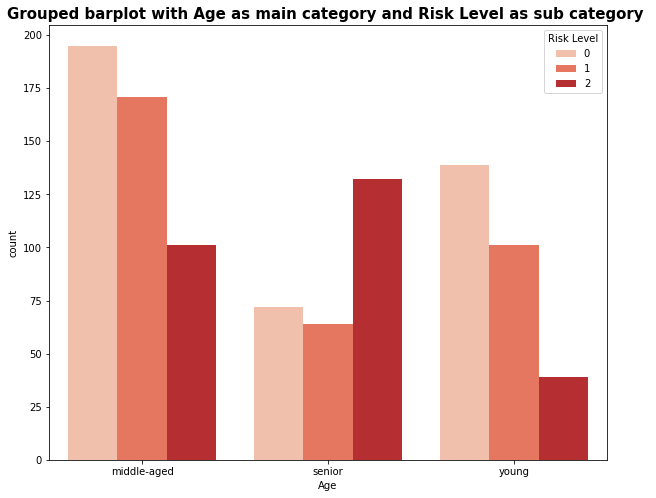

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x = data["Group"], y = data["count"], hue = "RiskLevel", data= data, palette="Reds")
plt.title("Grouped barplot with Age as main category and Risk Level as sub category ", fontsize = 15, fontweight = 'bold')
ax.legend(title = "Risk Level", loc = "upper right")
plt.xlabel("Age")
plt.show()

# Categorizing the entire population based on Blood Pressure and plotting in the form of Pie-chart

In [22]:
data['BP_Type'] = np.select([data["SystolicBP"] < 120, 
                             (120 <= data["SystolicBP"]) & (data["SystolicBP"] <= 129), 
                             (130 <=data["SystolicBP"]) & (data["SystolicBP"] <=139), 
                             (140<=data["SystolicBP"]) & (data["SystolicBP"] <=180)], 
                            ['Nor_BP','Ele_BP','High_BP_01','High_BP_02'])
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Group,count,BP_Type
0,25,130,80,15.0,98.0,86,2,middle-aged,101,High_BP_01
1,35,140,90,13.0,98.0,70,2,middle-aged,101,High_BP_02
2,29,90,70,8.0,100.0,80,2,middle-aged,101,Nor_BP
3,30,140,85,7.0,98.0,70,2,middle-aged,101,High_BP_02
4,35,120,60,6.1,98.0,76,0,middle-aged,195,Ele_BP
...,...,...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2,middle-aged,101,Ele_BP
1010,55,120,90,18.0,98.0,60,2,senior,132,Ele_BP
1011,35,85,60,19.0,98.0,86,2,middle-aged,101,Nor_BP
1012,43,120,90,18.0,98.0,70,2,senior,132,Ele_BP


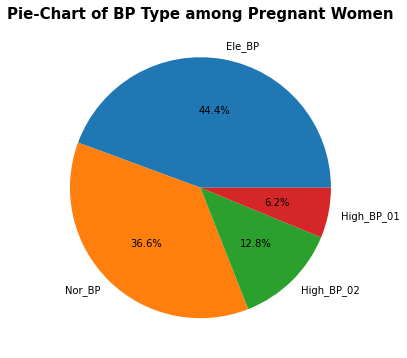

Ele_BP        450
Nor_BP        371
High_BP_02    130
High_BP_01     63
Name: BP_Type, dtype: int64

In [23]:
# Assume that 'data' is a DataFrame and 'categorical_var' is the column name of the categorical variable
counts = data["BP_Type"].value_counts()

# Plot the pie chart
fig, ax = plt.subplots(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title("Pie-Chart of BP Type among Pregnant Women", fontsize = 15, fontweight = 'bold')
plt.show()
data['BP_Type'].value_counts()

## Calculating the count and analysing pregnancy risk rate in three sub categories of  blood glucose level

In [24]:
sections = [(data['BS'] < 7.8 ),\
           (data['BS'] >= 7.8) & (data['BS'] <= 11.0),\
           (data["BS"] > 11.0) ]

choice =["normal","at risk","gestational diabetes"]
data['Group_of_BS'] = np.select(sections, choice)
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Group,count,BP_Type,Group_of_BS
0,25,130,80,15.0,98.0,86,2,middle-aged,101,High_BP_01,gestational diabetes
1,35,140,90,13.0,98.0,70,2,middle-aged,101,High_BP_02,gestational diabetes
2,29,90,70,8.0,100.0,80,2,middle-aged,101,Nor_BP,at risk
3,30,140,85,7.0,98.0,70,2,middle-aged,101,High_BP_02,normal
4,35,120,60,6.1,98.0,76,0,middle-aged,195,Ele_BP,normal
...,...,...,...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2,middle-aged,101,Ele_BP,gestational diabetes
1010,55,120,90,18.0,98.0,60,2,senior,132,Ele_BP,gestational diabetes
1011,35,85,60,19.0,98.0,86,2,middle-aged,101,Nor_BP,gestational diabetes
1012,43,120,90,18.0,98.0,70,2,senior,132,Ele_BP,gestational diabetes


In [25]:
#Finding the count
print(data[(data["Group_of_BS"] == "normal") & (data["RiskLevel"] == 0)].RiskLevel.value_counts()[0])
print(data[(data["Group_of_BS"] == "normal") & (data["RiskLevel"] == 1)].RiskLevel.value_counts()[1])
print(data[(data["Group_of_BS"] == "normal") & (data["RiskLevel"] == 2)].RiskLevel.value_counts()[2])
print(data[(data["Group_of_BS"] == "at risk") & (data["RiskLevel"] == 0)].RiskLevel.value_counts()[0])
print(data[(data["Group_of_BS"] =="at risk") & (data["RiskLevel"] == 1)].RiskLevel.value_counts()[1])
print(data[(data["Group_of_BS"] == "at risk") & (data["RiskLevel"] == 2)].RiskLevel.value_counts()[2])
#print(data[(data["Group_of_BS"] == "gestational diabetes") & (data["RiskLevel"] == 0)].RiskLevel.value_counts()[0])
print(data[(data["Group_of_BS"] == "gestational diabetes") & (data["RiskLevel"] == 1)].RiskLevel.value_counts()[1])
print(data[(data["Group_of_BS"] == "gestational diabetes") & (data["RiskLevel"] == 2)].RiskLevel.value_counts()[2])

345
244
57
61
68
85
24
130


In [26]:
sections = [(data["Group_of_BS"] == "normal") & (data["RiskLevel"] == 0),\
           (data["Group_of_BS"] == "normal") & (data["RiskLevel"] == 1),\
           (data["Group_of_BS"] == "normal") & (data["RiskLevel"] == 2),\
           (data["Group_of_BS"] == "at risk") & (data["RiskLevel"] == 0),\
           (data["Group_of_BS"] == "at risk") & (data["RiskLevel"] == 1),\
           (data["Group_of_BS"] == "at risk") & (data["RiskLevel"] == 2),\
           (data["Group_of_BS"] == "gestational diabetes") & (data["RiskLevel"] == 0),\
           (data["Group_of_BS"] == "gestational diabetes") & (data["RiskLevel"] == 1),\
           (data["Group_of_BS"] == "gestational diabetes") & (data["RiskLevel"] == 2)]
choice =[345,244,57,61,68,85,0,24,130]
data['count_of_BS'] = np.select(sections, choice)
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Group,count,BP_Type,Group_of_BS,count_of_BS
0,25,130,80,15.0,98.0,86,2,middle-aged,101,High_BP_01,gestational diabetes,130
1,35,140,90,13.0,98.0,70,2,middle-aged,101,High_BP_02,gestational diabetes,130
2,29,90,70,8.0,100.0,80,2,middle-aged,101,Nor_BP,at risk,85
3,30,140,85,7.0,98.0,70,2,middle-aged,101,High_BP_02,normal,57
4,35,120,60,6.1,98.0,76,0,middle-aged,195,Ele_BP,normal,345
...,...,...,...,...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2,middle-aged,101,Ele_BP,gestational diabetes,130
1010,55,120,90,18.0,98.0,60,2,senior,132,Ele_BP,gestational diabetes,130
1011,35,85,60,19.0,98.0,86,2,middle-aged,101,Nor_BP,gestational diabetes,130
1012,43,120,90,18.0,98.0,70,2,senior,132,Ele_BP,gestational diabetes,130


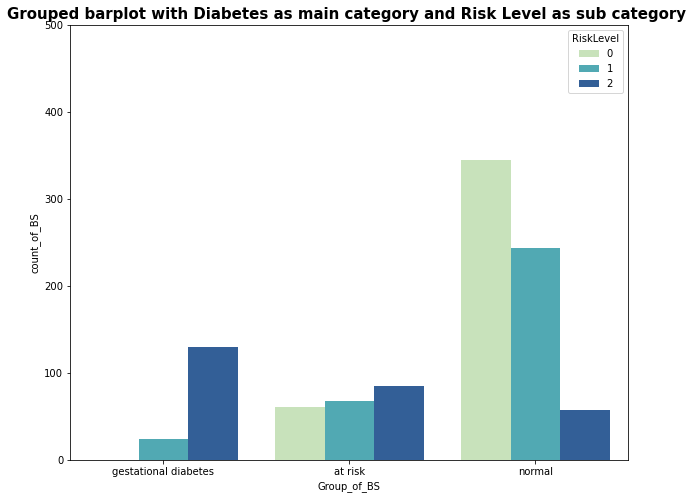

In [27]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x = data["Group_of_BS"], y = data["count_of_BS"], hue = "RiskLevel", data= data, palette="YlGnBu")
plt.title("Grouped barplot with Diabetes as main category and Risk Level as sub category ", fontsize = 15, fontweight = 'bold')
plt.ylim(0,500)
plt.show()

In [28]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assign the independent and dependent variables
X = data[['Age']]
y = data['HeartRate']

# Create an instance of the linear regression model
model = LinearRegression()

# Fit the model with the data
model.fit(X, y)

# Print the intercept and coefficients
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

# Predict the Heart rate for the given age
prediction = model.predict([[30]])
print('Predicted value:', prediction)

Intercept: 72.87083582501042
Coefficients: [0.04790269]
Predicted value: [74.30791652]


C:\Users\PC\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assign the independent and dependent variables
X = data[['SystolicBP','BS']]
y = data['DiastolicBP']

# Create an instance of the linear regression model
model = LinearRegression()

# Fit the model with the data
model.fit(X, y)

# Print the intercept and coefficients
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

# Predict the value of the dependent variable for a 
#new set of values of the independent variables
prediction = model.predict([[120,18]])
print('Predicted value:', prediction)


Intercept: 9.191781276295757
Coefficients: [0.55886499 0.45911666]
Predicted value: [84.51968056]


C:\Users\PC\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
